<a href="https://colab.research.google.com/github/SampatPolireddi/ML_Projects/blob/main/Zomato_data_visualization_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/drive/MyDrive/Zomato/zomato.csv")

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

**Data Cleaning**

In [ ]:
#Removing unimportant col
df=df.drop(['url','address','phone','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

In [ ]:
#Renaming col
df.rename(columns = {'approx_cost(for two people)':'Cost_per_plate', 'listed_in(type)':'Type','rest_type':'Dining_type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,Dining_type,cuisines,Cost_per_plate,Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
#Removing unesscary char from 'rate' col 
#Converting 'rate' col to float
from numpy.core.numeric import NaN
count=0

for i in df['rate']:
  
  if i=='NEW' or i=='-':
    df['rate'][count]= NaN
  else:
    i = str(i).split('/')
    i = i[0]
    df['rate'][count]=float(i)
  count+=1

df['rate']=pd.to_numeric(df['rate'])
#print(count)

In [ ]:
df.drop_duplicates(inplace=True) #Removing duplicates
df.shape

(31936, 10)

In [ ]:
#Filling null val with mean of the col
df['rate'] = df['rate'].fillna(df['rate'].mean()).astype(float)

In [ ]:
df['rate'].isnull().sum() #Checking no.of null val in 'rate' col
df.rename(columns={'rate':'Ratings'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31936 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            31936 non-null  object 
 1   online_order    31936 non-null  object 
 2   book_table      31936 non-null  object 
 3   Ratings         31936 non-null  float64
 4   votes           31936 non-null  int64  
 5   location        31922 non-null  object 
 6   Dining_type     31804 non-null  object 
 7   cuisines        31904 non-null  object 
 8   Cost_per_plate  31744 non-null  object 
 9   Type            31936 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.7+ MB


In [ ]:
df['Cost_per_plate']=df['Cost_per_plate'].replace({',':''},regex=True) #Removing char from the col val
df['Cost_per_plate']=pd.to_numeric(df['Cost_per_plate']) #Converting col value from string to float

In [ ]:
#Filling null val with mean of the col
df['Cost_per_plate'] = df['Cost_per_plate'].fillna(df['Cost_per_plate'].mean()).astype(float)

In [ ]:
df['Cost_per_plate'].isnull().sum()#Checking if no.of null val in 'Cost_per_plate' col are zero

0

In [ ]:
df.isnull().sum()

name                0
online_order        0
book_table          0
Ratings             0
votes               0
location           14
Dining_type       132
cuisines           32
Cost_per_plate      0
Type                0
dtype: int64

Here there are some null values in 'location', 'rest_type','cuisines'

In [ ]:
#Removing those null values
df.dropna(inplace=True)
df.isnull().sum() #For conformation

name              0
online_order      0
book_table        0
Ratings           0
votes             0
location          0
Dining_type       0
cuisines          0
Cost_per_plate    0
Type              0
dtype: int64

In [ ]:
#Note: Intially a 'Cost_per_plate' has the data for two people, now by dividing it by 2 will make it easier in data visualization
count=0
for i in df['Cost_per_plate']:
  i=i/2
  df['Cost_per_plate'][count]=i
  count+=1

We have cleaned 'rate' and 'cost_per_plate'


Cleaning 'Type'

In [ ]:
df['Type'].value_counts()

Delivery              14508
Dine-out              11792
Desserts               2244
Cafes                  1165
Drinks & nightlife      875
Buffet                  623
Pubs and bars           579
Name: Type, dtype: int64

In [ ]:
#Rather than having my classes in 'Type', we can reduce the no.of variables.
#We can keep 'Drinks & nightlife', 'Pubs and bars' in 'Others'
#And 'Buffet' into 'Dine-out'

df['Type']=df['Type'].replace({'Drinks & nightlife':'Others','Pubs and bars':'Others','Buffet':'Dine-out'})
df['Type'].value_counts()

Delivery    14508
Dine-out    12415
Desserts     2244
Others       1454
Cafes        1165
Name: Type, dtype: int64

Cleaning 'cuisines'

In [ ]:
df['cuisines'].value_counts()

North Indian                                                   1723
North Indian, Chinese                                          1380
South Indian                                                   1074
Bakery, Desserts                                                544
Biryani                                                         511
                                                               ... 
Andhra, Hyderabadi                                                1
North Indian, South Indian, Kerala, Chinese                       1
South Indian, Kebab, Chinese, Biryani                             1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
North Indian, Chinese, Arabian, Momos                             1
Name: cuisines, Length: 2712, dtype: int64

In [ ]:
#Here we can put cuisines which are less than 200 into one group named 'Other
cuisines = df['cuisines'].value_counts()
cuisines_temp = cuisines[cuisines<200]


def simplify_cuisines(i):
    if i in cuisines_temp:
        return 'Others'
    else:
        return i
        
df['cuisines'] = df['cuisines'].apply(simplify_cuisines)
df['cuisines'].value_counts()

Others                                 22902
North Indian                            1723
North Indian, Chinese                   1380
South Indian                            1074
Bakery, Desserts                         544
Biryani                                  511
Fast Food                                429
South Indian, North Indian, Chinese      424
Cafe                                     403
Desserts                                 389
Bakery                                   341
Chinese                                  308
Ice Cream, Desserts                      278
Mithai, Street Food                      234
Chinese, North Indian                    217
Desserts, Ice Cream                      214
North Indian, Chinese, Biryani           213
North Indian, South Indian               202
Name: cuisines, dtype: int64

In [ ]:
df.head()

,name,online_order,book_table,Ratings,votes,location,Dining_type,cuisines,Cost_per_plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Others,400.0,Dine-out
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,400.0,Dine-out
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Others,400.0,Dine-out
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Others,150.0,Dine-out
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,300.0,Dine-out


Cleaning 'Dining_type'

In [ ]:
df['Dining_type'].value_counts()

Quick Bites                   10957
Casual Dining                  6997
Cafe                           2396
Dessert Parlor                 1360
Delivery                       1334
                              ...  
Bakery, Sweet Shop                1
Mess, Quick Bites                 1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: Dining_type, Length: 93, dtype: int64

In [ ]:
#Here we can put cuisines which are less than 200 into one group named 'Other'
#Merging 'Bar','Casual dining, Bar' and 'Bar, Casual dining' into one

Dining_type = df['Dining_type'].value_counts()
Dining_type_temp = Dining_type[Dining_type<200]

bar_temp=[]
bar_temp.append('Bar')
bar_temp.append('Casual Dining, Bar')
bar_temp.append('Bar, Casual Dining')

def simplify_Dining_type(i):

    if i in Dining_type_temp:
        return 'Others'
    elif i in bar_temp:
        return 'Bar'
    else:
        return i
        
df['Dining_type'] = df['Dining_type'].apply(simplify_Dining_type)
df['Dining_type'].value_counts()

Quick Bites            10957
Casual Dining           6997
Others                  2933
Cafe                    2396
Bar                     1698
Dessert Parlor          1360
Delivery                1334
Takeaway, Delivery      1083
Bakery                   667
Beverage Shop            414
Food Court               384
Pub                      305
Lounge                   294
Fine Dining              256
Casual Dining, Cafe      250
Sweet Shop               241
Pub, Casual Dining       217
Name: Dining_type, dtype: int64

In [ ]:
df.head()

,name,online_order,book_table,Ratings,votes,location,Dining_type,cuisines,Cost_per_plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Others,400.0,Dine-out
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,400.0,Dine-out
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,Others,400.0,Dine-out
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Others,150.0,Dine-out
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,300.0,Dine-out


Cleaning 'Location'

In [ ]:
df['location'].value_counts()

BTM                     2074
Whitefield              1814
Indiranagar             1692
HSR                     1606
Marathahalli            1534
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [ ]:
location = df['location'].value_counts()

location_temp = location[location<200]

def simplify_loc(i):
    if i in location_temp:
        return 'Others'
    else:
        return i
        
df['location'] = df['location'].apply(simplify_loc)
df['location'].value_counts()

Others                   3518
BTM                      2074
Whitefield               1814
Indiranagar              1692
HSR                      1606
Marathahalli             1534
Koramangala 5th Block    1427
JP Nagar                 1322
Electronic City          1213
Jayanagar                1102
Bannerghatta Road        1020
Bellandur                 994
Sarjapur Road             874
Brigade Road              614
New BEL Road              584
Banashankari              559
Kalyan Nagar              553
Malleshwaram              551
Brookefield               530
MG Road                   527
Koramangala 4th Block     519
Koramangala 7th Block     511
Koramangala 6th Block     507
Ulsoor                    496
Rajajinagar               458
Frazer Town               447
Koramangala 1st Block     438
Church Street             434
Basavanagudi              433
Banaswadi                 402
Kammanahalli              392
Residency Road            379
Lavelle Road              379
Old Airpor

**Data Visualization**

Ratio of restaurants having online ordering facility


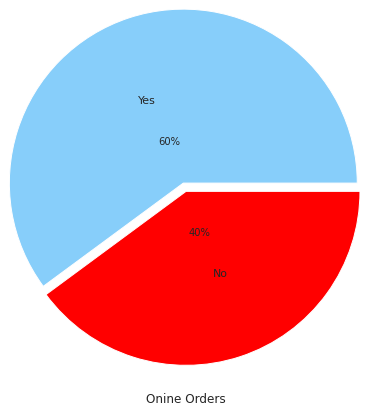

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import axes


names=['Yes','No']
colors=['lightskyblue','red']
plt.pie(df['online_order'].value_counts(),labels=names, colors=colors, autopct='%1.0f%%',pctdistance=0.25,labeldistance=0.5, radius=2, explode=[0.1,0.0])

plt.title("Onine Orders",y=-0.5) 
plt.show() #Chart shows percentage of online orders

Ratio of restaurants having table booking facility

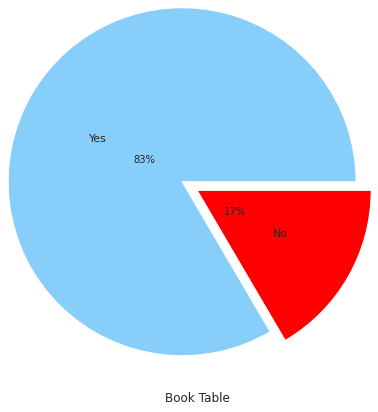

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import axes

names=['Yes','No']
colors=['lightskyblue','red']
plt.pie(df['book_table'].value_counts(),labels=names, colors=colors, autopct='%1.0f%%',pctdistance=0.25,labeldistance=0.5, radius=2,explode=[0.2,0.0])

plt.title("Book Table",y=-0.5) 
plt.show() #Chart shows percentage of online orders

Various types of restaurants

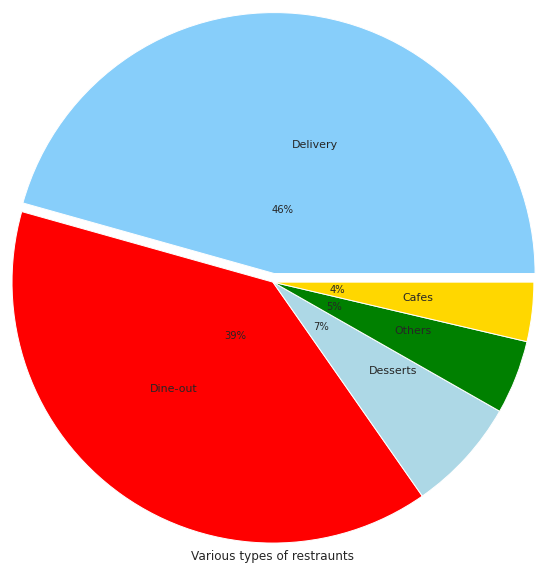

In [ ]:
names=['Delivery', 'Dine-out', 'Desserts', 'Others', 'Cafes']
colors=['lightskyblue', 'red', 'lightblue', 'green', 'gold']
plt.pie(df['Type'].value_counts(),labels=names, colors=colors, autopct='%1.0f%%',pctdistance=0.25,labeldistance=0.5, radius=3,explode=[0.1,0.0,0.0,0.0,0.0])
plt.title("Various types of restraunts",y=-0.8)
plt.show()

Distribution of ratings 

Text(0.5, 1.0, 'Distribution of Ratings')

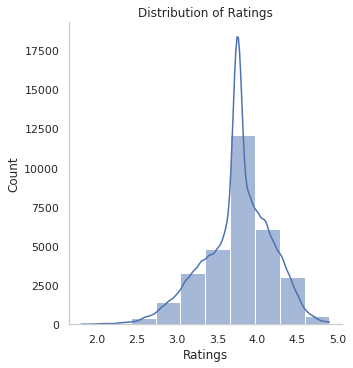

In [ ]:
sns.set_style(style='whitegrid')
sns.displot(df['Ratings'],bins=10, kde= True)
plt.grid(b=None)
plt.title("Distribution of Ratings")

Distribution of cost per plate 

Text(0.5, 1.0, 'Distribution of cost per plate')

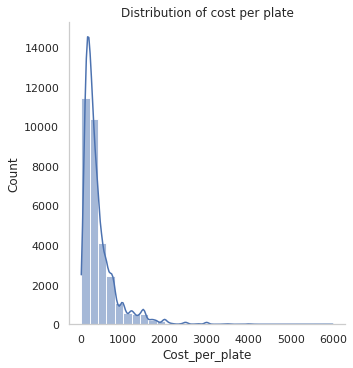

In [ ]:
sns.set_style(style='whitegrid')
sns.displot(df['Cost_per_plate'],bins=30, kde= True)
plt.grid(b=None)
plt.title("Distribution of cost per plate")
#Remove from 2k

Distribution of votes

Text(0.5, 1.0, 'Distribution of votes')

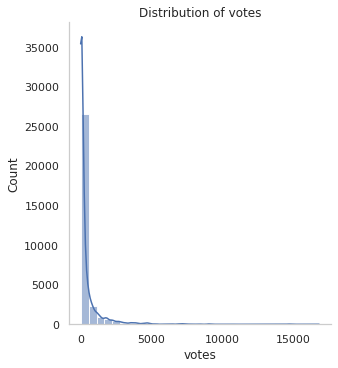

In [ ]:
sns.set_style(style='whitegrid')
sns.displot(df['votes'],bins=30, kde= True)
plt.grid(b=None)
plt.title("Distribution of votes")

Location Density

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

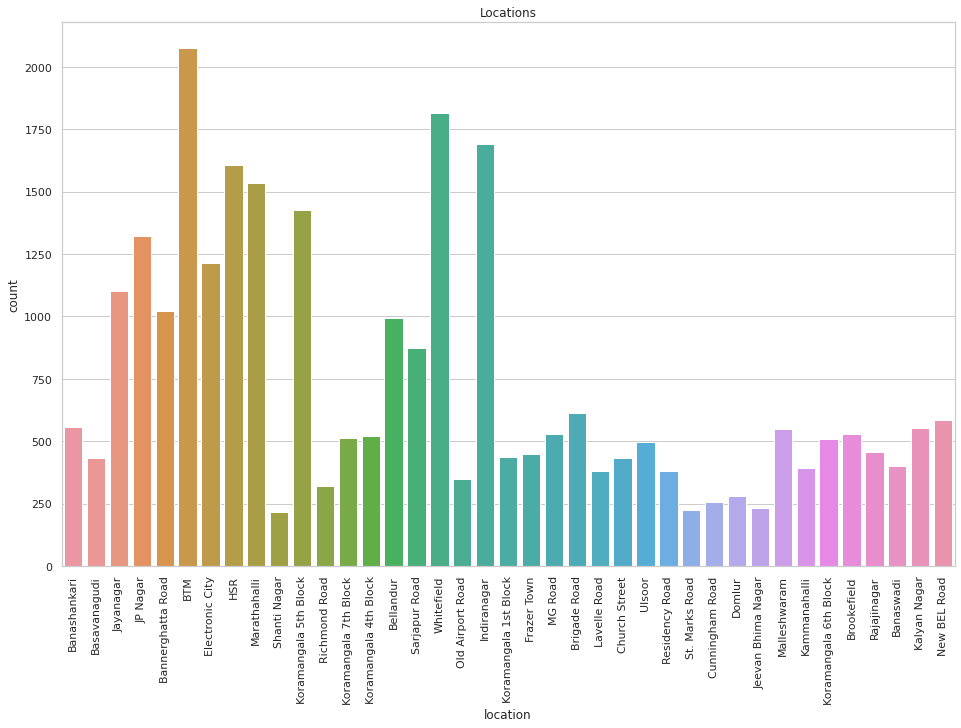

In [ ]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['location'][df['location'] != "Others"])
plt.title("Locations")
plt.xticks(rotation=90)

Popular Dining Types

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

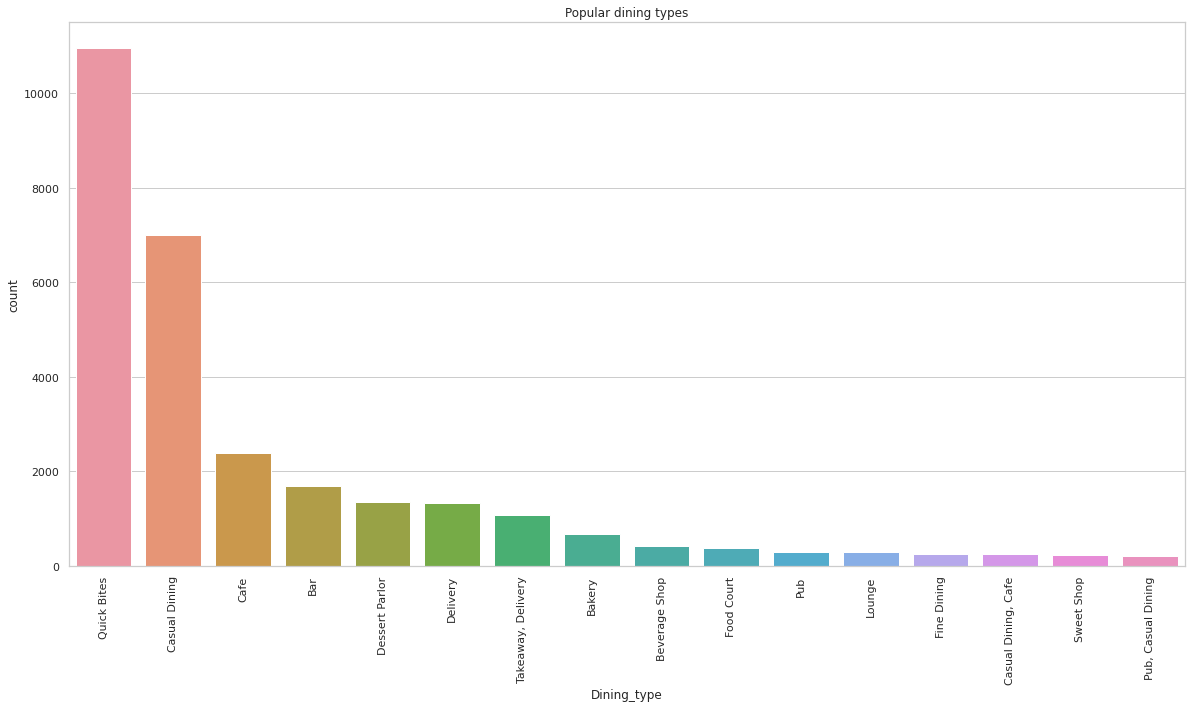

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(df['Dining_type'][df['Dining_type'] != "Others"],order=(df['Dining_type'][df['Dining_type']!='Others']).value_counts().index)
plt.title('Popular dining types')
plt.xticks(rotation=90)

Popular cuisines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

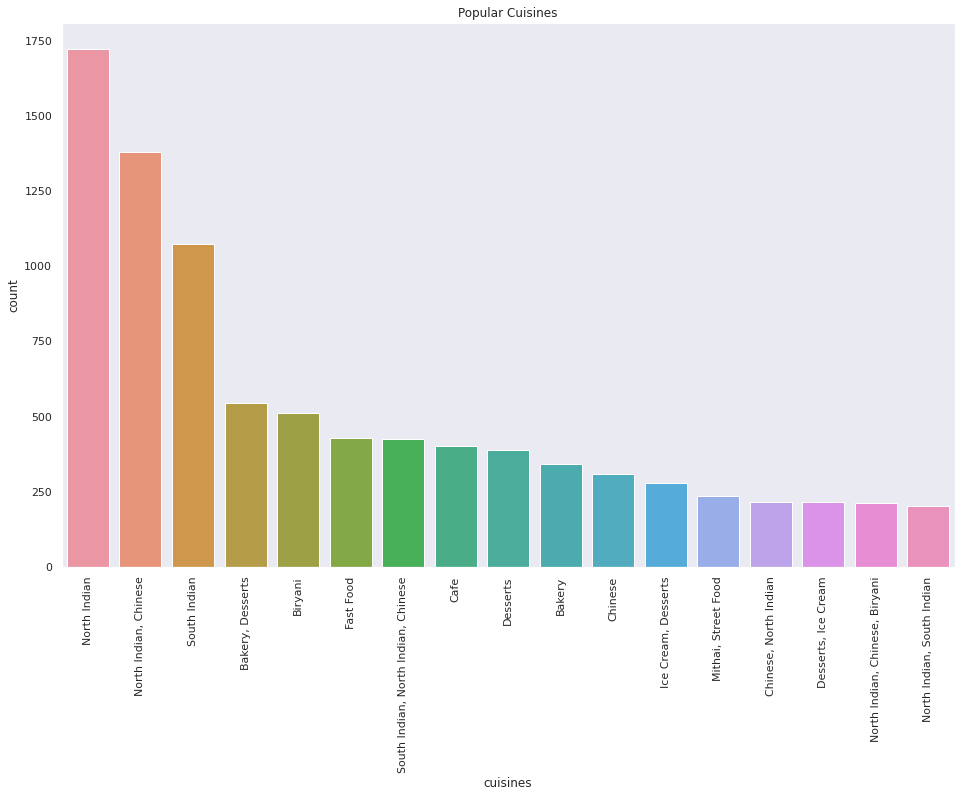

In [ ]:
plt.figure(figsize = (16,10))
sns.set(style='dark')
ax = sns.countplot(df['cuisines'][df['cuisines'] != "Others"], order= df['cuisines'][df['cuisines'] != "Others"].value_counts().index)
plt.title("Popular Cuisines")
plt.xticks(rotation=90)

Most popular restraunts

Text(0, 0.5, 'Count')

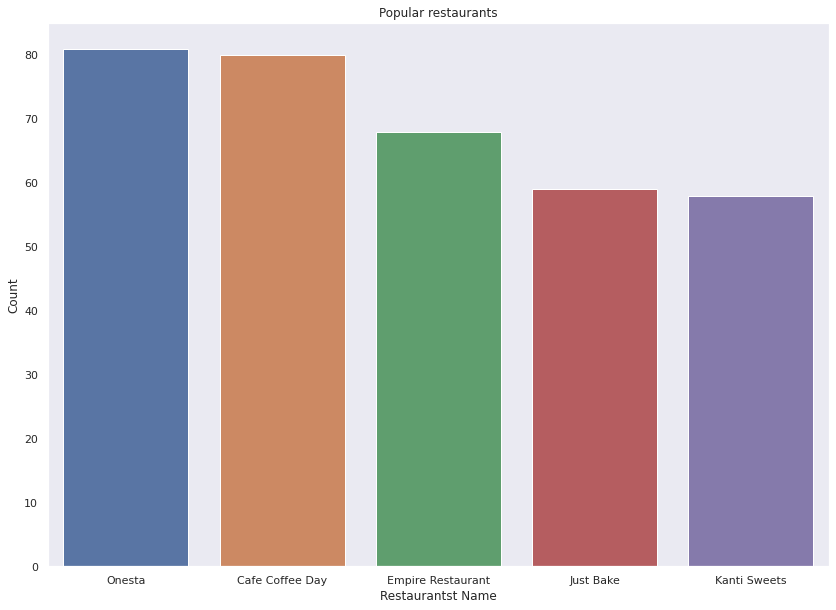

In [ ]:
plt.figure(figsize = (14,10))
sns.set(style='dark')
sns.barplot(x=df['name'].value_counts()[0:5].index,y=df['name'].value_counts()[0:5])
plt.title("Popular restaurants")
plt.xlabel('Restaurantst Name')
plt.ylabel('Count')
#Graph shows no.of outlets each restraunt has

Cuisines vs Cost per plate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

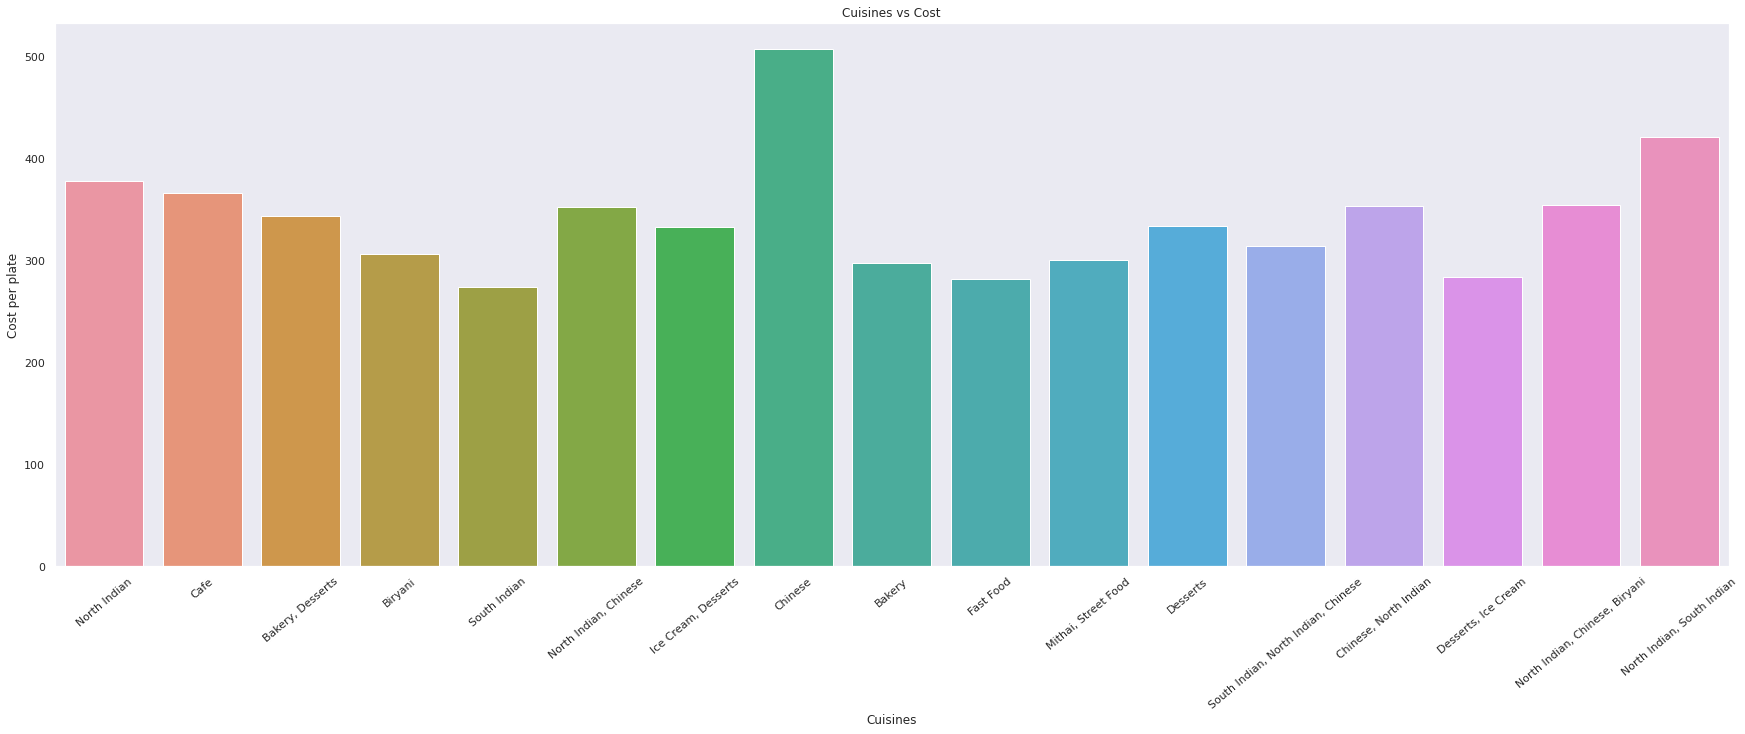

In [ ]:
plt.figure(figsize = (30,10))
sns.set(style='dark')

x=df['cuisines'][df['cuisines'] != "Others"]
y=df['Cost_per_plate']

sns.barplot(x,y,ci=0)
plt.title("Cuisines vs Cost")
plt.xlabel('Cuisines')
plt.ylabel('Cost per plate')
plt.xticks(rotation=40)

Location vs Cost

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

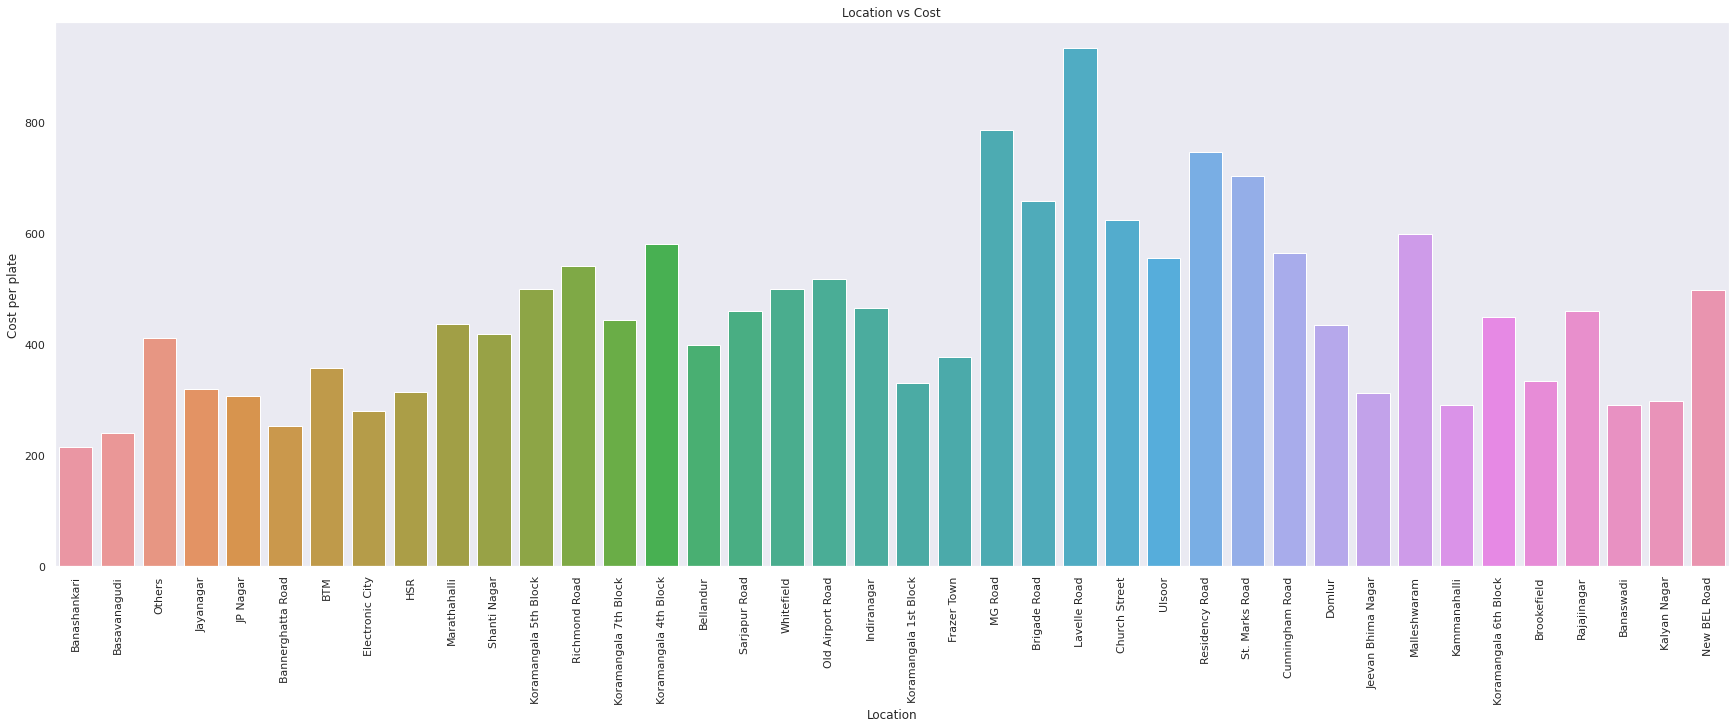

In [ ]:
plt.figure(figsize = (30,10))
sns.set(style='dark')

x=df['location']
y=df['Cost_per_plate']

sns.barplot(x,y,ci=0)
plt.title("Location vs Cost")
plt.xlabel('Location')
plt.ylabel('Cost per plate')
plt.xticks(rotation=90)

Top Rated Cuisnes by the user

In [ ]:
print("Top Rated Cuisines")
df.groupby('cuisines')['Ratings'].max().nlargest(5)

Top Rated Cuisines


cuisines
Desserts               4.9
Ice Cream, Desserts    4.9
North Indian           4.9
Others                 4.9
Bakery, Desserts       4.8
Name: Ratings, dtype: float64

Top rated restaurants

In [ ]:
print("Top rated restaurants")
df.groupby('name')['Ratings'].max().nlargest(5)

Top rated restaurants


name
AB's - Absolute Barbecues         4.9
Asia Kitchen By Mainland China    4.9
Belgian Waffle Factory            4.9
Byg Brewski Brewing Company       4.9
Flechazo                          4.9
Name: Ratings, dtype: float64

Price vs Rating

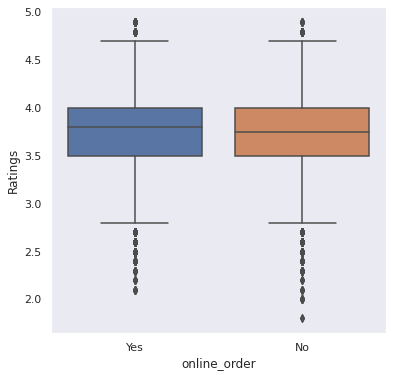

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(data=df,x = 'online_order', y = 'Ratings')
#From this graph we can tell wheather rating of a restraunt is effected when online order is available or not

**Preparing the data for ML models**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['location']= label_encoder.fit_transform(df['location'])
print('Location:',df['location'].unique())


df['cuisines']= label_encoder.fit_transform(df['cuisines'])
print('Cuisines:',df['cuisines'].unique())

df['Dining_type']= label_encoder.fit_transform(df['Dining_type'])
print('Dining Type:',df['Dining_type'].unique())

df['Type']= label_encoder.fit_transform(df['Type'])
print('Type:',df['Type'].unique())

Location: [ 1  4 31 16 15  3  0 11 13 28 36 22 34 24 21  5 35 39 30 14 20 12 26  6
 25  8 38 33 37  9 10 17 27 19 23  7 32  2 18 29]
Cuisines: [15 11  3  1  2 16 12  9  4  0  8 10  6 17  5  7 13 14]
Dining Type: [ 4 11 14  5  3  6  7 12  0 16  8  2 15  1 13 10  9]
Type: [3 0 1 2 4]


Finding the correlation 

In [ ]:
#For finding correlation
df['online_order']=df['online_order'].replace({'No':0,'Yes':1})
df['book_table']=df['book_table'].replace({'No':0,'Yes':1})

In [ ]:
continous_col=['Ratings','votes','Cost_per_plate','online_order','book_table','location','cuisines','Dining_type','Type','online_order']

#Correlation matrix
correlation_df=df[continous_col].corr()
correlation_df

,Ratings,votes,Cost_per_plate,online_order,book_table,location,cuisines,Dining_type,Type,online_order
Ratings,1.000000,0.444486,0.248317,0.034832,0.438150,0.048402,0.105450,-0.215584,0.080041,0.034832
votes,0.444486,1.000000,0.247163,0.013605,0.400850,0.022787,0.115980,-0.174189,0.122318,0.013605
Cost_per_plate,0.248317,0.247163,1.000000,-0.079854,0.363634,0.150276,0.083313,-0.180874,0.195380,-0.079854
online_order,0.034832,0.013605,-0.079854,1.000000,-0.023001,-0.055446,0.043461,-0.020034,-0.235037,1.000000
book_table,0.438150,0.400850,0.363634,-0.023001,1.000000,0.061833,0.147374,-0.304536,0.213931,-0.023001
location,0.048402,0.022787,0.150276,-0.055446,0.061833,1.000000,-0.002361,-0.037977,0.034824,-0.055446
cuisines,0.105450,0.115980,0.083313,0.043461,0.147374,-0.002361,1.000000,0.074862,0.092458,0.043461
Dining_type,-0.215584,-0.174189,-0.180874,-0.020034,-0.304536,-0.037977,0.074862,1.000000,-0.022338,-0.020034
Type,0.080041,0.122318,0.195380,-0.235037,0.213931,0.034824,0.092458,-0.022338,1.000000,-0.235037
online_order,0.034832,0.013605,-0.079854,1.000000,-0.023001,-0.055446,0.043461,-0.020034,-0.235037,1.000000


In [ ]:
#Finding cols where absolute corr>0.2 with target var
correlation_df['Ratings'][abs(correlation_df['Ratings'])>0.2]

Ratings           1.000000
votes             0.444486
Cost_per_plate    0.248317
book_table        0.438150
Dining_type      -0.215584
Name: Ratings, dtype: float64

Predictors='votes','Cost_per_plate','book_table'

Target='Ratings'

In [ ]:
ml_df=df.drop(['name'],axis=1)
#ml_df=df
ml_df.head()

,online_order,book_table,Ratings,votes,location,Dining_type,cuisines,Cost_per_plate,Type
0,1,1,4.1,775,1,4,15,400.0,3
1,1,0,4.1,787,1,4,15,400.0,3
2,1,0,3.8,918,1,11,15,400.0,3
3,0,0,3.7,88,1,14,15,150.0,3
4,0,0,3.8,166,4,4,15,300.0,3


In [ ]:
from sklearn.model_selection import train_test_split

col=['book_table','votes','Cost_per_plate','Dining_type']
X=ml_df[col]

y=ml_df['Ratings']  # Labels

#Spliting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) 

**Machine Learning Models**

Multiple Linear Regression

In [ ]:
from pydoc import tempfilepager
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

temp=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print('R2:', metrics.r2_score(y_train,temp.predict(X_train)))
y_pred

R2: 0.28594598843727415


array([3.63119806, 3.79823367, 4.23992751, ..., 3.69223738, 3.67979108,
       3.61415589])

In [ ]:
comp = pd.DataFrame({ "actual": y_test, "pred": y_pred })
comp 
#Actual value vs Predicted value

,actual,pred
20708,3.753177,3.631198
50136,3.900000,3.798234
35263,4.000000,4.239928
627,3.753177,3.634428
10855,4.200000,3.723417
...,...,...
10467,3.400000,3.602361
5585,4.200000,3.774304
49664,3.800000,3.692237
4166,3.700000,3.679791


In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.28571029089012423
mean_sqrd_error is== 0.12305808985021209
root_mean_squared error of is== 0.3507963652180736


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Reg_model=DecisionTreeRegressor(max_depth=None,criterion='mse')

print(Reg_model)

Reg_model.fit(X_train,y_train)
y_pred=Reg_model.predict(X_test)

DecisionTreeRegressor(criterion='mse')


In [ ]:
comp = pd.DataFrame({ "actual": y_test, "pred": y_pred })
comp 
#Actual value vs Predicted value

,actual,pred
20708,3.753177,3.753177
50136,3.900000,3.900000
35263,4.000000,4.000000
627,3.753177,3.753177
10855,4.200000,4.200000
...,...,...
10467,3.400000,3.320000
5585,4.200000,3.900000
49664,3.800000,3.800000
4166,3.700000,3.700000


R2 value: 0.9190847015394467


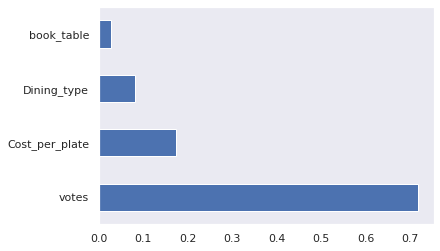

In [ ]:
from sklearn import metrics

print('R2 value:', metrics.r2_score(y_train,Reg_model.predict(X_train)))

%matplotlib inline
feature_importances= pd.Series(Reg_model.feature_importances_,index=col)
feature_importances.nlargest(10).plot(kind='barh')

Knn Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.42398572196772855
RMSE value for k=  2 is: 0.37537948101349883
RMSE value for k=  3 is: 0.3513351949957059
RMSE value for k=  4 is: 0.34232061909285283
RMSE value for k=  5 is: 0.3367728607750341
RMSE value for k=  6 is: 0.33250441310779466
RMSE value for k=  7 is: 0.3304277373633237
RMSE value for k=  8 is: 0.32829985671522205
RMSE value for k=  9 is: 0.32573819663584813
RMSE value for k=  10 is: 0.3246536641476335
RMSE value for k=  11 is: 0.32338233502733993
RMSE value for k=  12 is: 0.3222717760012997
RMSE value for k=  13 is: 0.32177108658834813
RMSE value for k=  14 is: 0.3217570820801443
RMSE value for k=  15 is: 0.3215803917831906
RMSE value for k=  16 is: 0.32104511285449583
RMSE value for k=  17 is: 0.32065216004495417
RMSE value for k=  18 is: 0.3205750680903589
RMSE value for k=  19 is: 0.3205721833201159
RMSE value for k=  20 is: 0.32067915975492284
RMSE value for k=  21 is: 0.32083061843630273
RMSE value for k=  22 is: 0.32070815918703416
RMSE v

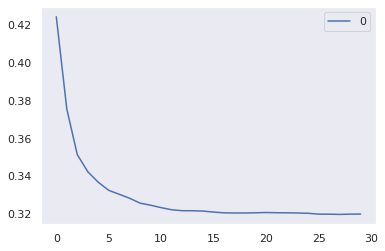

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=9)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
print(reg.score(X_test,y_test))

0.3841122032114066


Predicting whether table booking facility is available or not

**Logistic Regression**

In [ ]:
#Finding cols where absolute corr>0.2 with target var
correlation_df['book_table'][abs(correlation_df['book_table'])>0.2]

Ratings           0.438150
votes             0.400850
Cost_per_plate    0.363634
book_table        1.000000
Dining_type      -0.304536
Type              0.213931
Name: book_table, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

col=['Ratings','votes','Cost_per_plate','Dining_type','Type']
X=ml_df[col]

y=ml_df['book_table']  # Labels

#Spliting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) 

In [ ]:
from pydoc import tempfilepager
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,y_train)

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
 
print (X_train[0:10, :])

[[ 2.26778941e+00  4.07898169e+00 -7.99080122e-01 -1.52194186e+00
   9.60319782e-01]
 [-2.03967659e+00 -1.38262430e-01 -6.82005255e-02  1.03849880e+00
  -8.82944120e-01]
 [ 1.31057474e+00  2.49077504e-02  6.62679071e-01  4.47627876e-01
  -8.82944120e-01]
 [ 8.31967407e-01 -2.47042551e-01  4.19052539e-01 -9.31070938e-01
   9.60319782e-01]
 [-1.08246192e+00 -3.49779331e-01 -7.99080122e-01  1.03849880e+00
   9.60319782e-01]
 [ 8.31967407e-01  1.47430213e+00 -4.33640324e-01 -1.12802791e+00
  -1.80457607e+00]
 [ 2.00748368e-03 -3.94097158e-01 -3.11827058e-01 -1.71889883e+00
   3.86878311e-02]
 [ 5.92663741e-01 -3.05461504e-01 -6.82005255e-02 -3.40200018e-01
   9.60319782e-01]
 [-6.03854592e-01 -3.76974361e-01  5.36127405e-02 -9.31070938e-01
  -8.82944120e-01]
 [-1.80037292e+00 -3.65894905e-01  5.36127405e-02  1.03849880e+00
  -8.82944120e-01]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[7638  332]
 [ 808  758]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8804530201342282


In [ ]:
comp = pd.DataFrame({ "actual": y_test, "pred": y_pred })
comp 
#Actual value vs Predicted value

,actual,pred
20708,0,0
50136,0,0
35263,1,0
627,0,0
10855,0,1
...,...,...
10467,0,0
5585,0,0
49664,0,0
4166,0,0


Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9380243288590604


In [ ]:
comp = pd.DataFrame({ "actual": y_test, "pred": y_pred })
comp 

,actual,pred
20708,0,0
50136,0,0
35263,1,1
627,0,0
10855,0,0
...,...,...
10467,0,0
5585,0,0
49664,0,0
4166,0,0


**Improving the model**

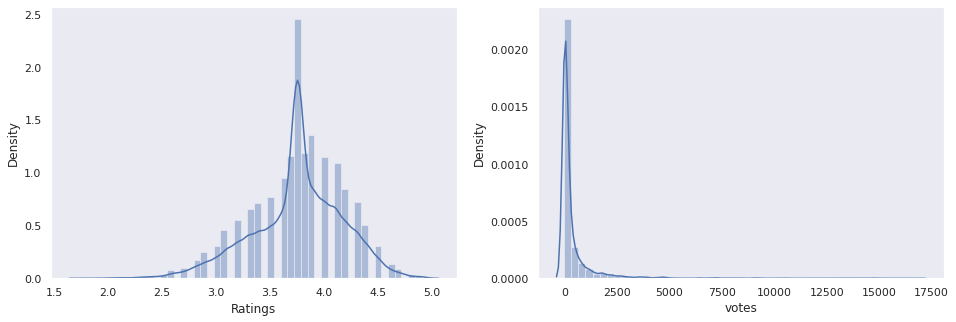

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Ratings'])
plt.subplot(1,2,2)
sns.distplot(df['votes'])
plt.show()

Finding outliers

In [ ]:
print("Highest allowed",df['Ratings'].mean() + 3*df['Ratings'].std())
print("Lowest allowed",df['Ratings'].mean() - 3*df['Ratings'].std())

Highest allowed 5.005889615795405
Lowest allowed 2.5035316809515837


Outliers

In [ ]:
df[(df['Ratings'] > 5.005889615795405) | (df['Ratings'] <2.5035316809515837)]

,name,online_order,book_table,Ratings,votes,location,Dining_type,cuisines,Cost_per_plate,Type
206,Dal Tadkaa,1,0,2.5,247,1,4,11,250.0,1
265,The Chaat Shop,1,0,2.5,35,4,14,8,100.0,1
587,Dal Tadkaa,1,0,2.5,247,1,4,11,225.0,3
1067,Grills & Rolls,1,0,2.5,321,15,14,15,200.0,1
1532,Mast Kalandar,0,0,2.4,183,3,6,11,250.0,1
...,...,...,...,...,...,...,...,...,...,...
51310,Imperia Restaurant,1,0,2.5,129,39,4,15,500.0,3
51476,Ammi's Biryani,0,0,2.5,131,39,14,15,500.0,3
51611,Chung Wah,0,0,2.5,73,31,4,15,800.0,3
51677,Bhagini,0,0,2.5,81,39,1,15,800.0,4


Removing the outliers

In [ ]:
new_df = df[(df['Ratings'] <5.005889615795405) & (df['Ratings'] >  2.5035316809515837)]

Capping on outliers

In [ ]:
upper_limit = df['Ratings'].mean() + 3*df['Ratings'].std()
lower_limit = df['Ratings'].mean() - 3*df['Ratings'].std()

In [ ]:
df['Ratings'] = np.where(
    df['Ratings']>upper_limit,
    upper_limit,
    np.where(
        df['Ratings']<lower_limit,
        lower_limit,
        df['Ratings']
    )
)

In [ ]:
df['Ratings'].describe()

count    31786.000000
mean         3.755596
std          0.414052
min          2.503532
25%          3.500000
50%          3.753177
75%          4.000000
max          4.900000
Name: Ratings, dtype: float64

Similary, remove the outliers for df['votes']

In [ ]:
print("Highest allowed",df['votes'].mean() + 3*df['votes'].std())
print("Lowest allowed",df['votes'].mean() - 3*df['votes'].std())

Highest allowed 3329.925660011424
Lowest allowed -2549.486347106372


In [ ]:
df[(df['votes'] > 3329.925660011424) | (df['votes'] <-2549.486347106372)]

,name,online_order,book_table,Ratings,votes,location,Dining_type,cuisines,Cost_per_plate,Type
38,Empire Restaurant,1,0,4.4,4884,16,4,15,375.0,1
86,Meghana Foods,1,0,4.4,4401,16,4,15,300.0,1
769,Vidyarthi Bhavan,0,0,4.4,4460,4,14,16,300.0,3
868,Barbeque Nation,0,1,4.7,3845,15,4,15,450.0,3
909,Onesta,1,1,4.4,4381,15,5,15,250.0,0
...,...,...,...,...,...,...,...,...,...,...
51071,Chili's American Grill & Bar,1,0,4.6,4957,39,4,15,1400.0,3
51649,Biergarten,0,1,4.7,7064,39,11,15,2400.0,4
51650,Windmills Craftworks,0,0,4.6,5954,39,11,15,2500.0,4
51685,Biergarten,0,1,4.7,7064,39,11,15,2400.0,4


In [ ]:
new_df = df[(df['votes'] <3329.925660011424) & (df['votes'] > -2549.486347106372)]

In [ ]:
upper_limit = df['votes'].mean() + 3*df['votes'].std()
lower_limit = df['votes'].mean() - 3*df['votes'].std()

In [ ]:
df['votes'] = np.where(
    df['votes']>upper_limit,
    upper_limit,
    np.where(
        df['votes']<lower_limit,
        lower_limit,
        df['votes']
    )
)

In [ ]:
df['votes'].describe()

count    31786.000000
mean       344.824701
std        675.780493
min          0.000000
25%         11.000000
50%         66.000000
75%        310.000000
max       3329.925660
Name: votes, dtype: float64

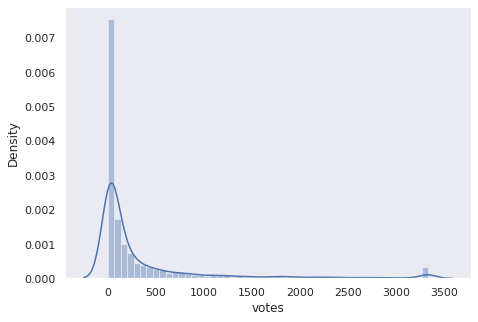

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['votes'])

Before:

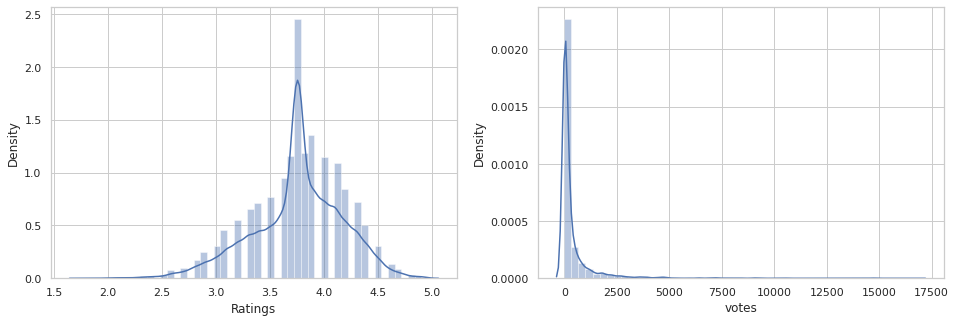

After:



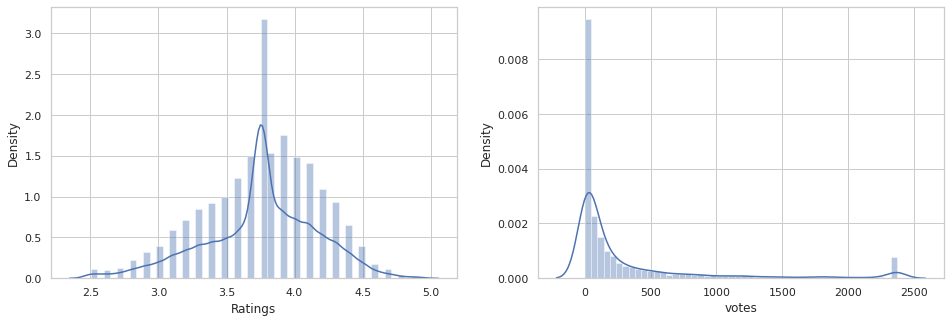